In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Load data
data = pd.read_csv('Local_Area_Unemployment_Statistics__Beginning_1976.csv')

In [8]:
# Create dates column in new dataframe from data
# axis = 1 sets range to columns
dates = data.apply(lambda x: pd.Timestamp('%d-%d-01' % (x.Year, x.Month)), axis=1)
d = pd.concat((data, pd.DataFrame({'date': dates})), axis=1)
d = d.sort_values(by='date')
d[:5]

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,date
519,New York State,1976,1,7634700,6780200,854400,11.2,1976-01-01
44850,BALANCE OF STATE,1976,1,4520500,4023100,497400,11.0,1976-01-01
25734,New York City,1976,1,3114200,2757200,357000,11.5,1976-01-01
42141,New York City,1976,1,3114200,2757200,357000,11.5,1976-01-01
520,New York State,1976,2,7623500,6769500,854000,11.2,1976-02-01


In [9]:
# Get different areas
nyc = d[d.Area == 'New York City']
nys = d[d.Area == 'New York State']
buf = d[d.Area == 'Buffalo City']

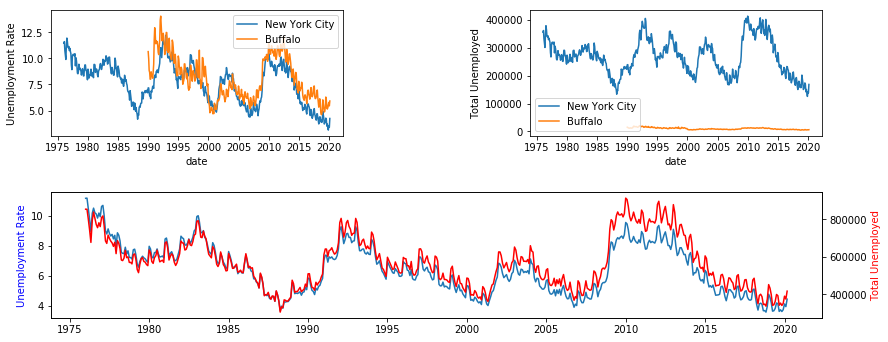

In [31]:
# Grid subplot with subplot2grid
# the first tuple is the grid size
# the second tuple is the grid location for this particular grid within the plot
plt.subplot2grid((2, 2), (0, 0))

# plots
plt.plot(nyc.date, 100*nyc['Unemployed']/nyc['Labor Force'], label='New York City')
plt.plot(buf.date, 100*buf['Unemployed']/buf['Labor Force'], label='Buffalo')

# labels
plt.xlabel('date')
plt.ylabel('Unemployment Rate')

# legend
plt.legend()

# subplots for total unemployment
plt.subplot2grid((2, 2), (0, 1))

# plots
plt.plot(nyc.date, nyc['Unemployed'], label="New York City")
plt.plot(buf.date, buf['Unemployed'], label="Buffalo")

# legend
plt.legend()

# labels
plt.xlabel('date')
plt.ylabel('Total Unemployed')

# subplot for New York State unemployment %
plt.subplot2grid((2, 2), (1, 0), colspan=2)

# plots
plt.plot(nys.date, 100*nys['Unemployed']/nys['Labor Force'], label='New York State Unemployment Rate')

# labels
plt.ylabel('Unemployment Rate', color='b')

# create second set of axis on same plot
plt.twinx()

# plots
plt.plot(nys.date, nys['Unemployed'], color='r')

# labels
plt.ylabel('Total Unemployed', color='r')
plt.xlabel('date')

# format layout for plot
plt.tight_layout()
plt.gcf().set_size_inches(15, 5)